In [34]:
from sklearn.preprocessing import MinMaxScaler


In [9]:
data_dir=os.path.join(r"archive (1)")

In [12]:
all_files=os.listdir(data_dir)

In [1]:
for files in all_files:
    print(os.path.join(data_dir,files))

In [28]:
google_stocks=pd.read_csv(r'archive (1)\GOOGL_2006-01-01_to_2018-01-01.csv',parse_dates=['Date'],index_col=['Date'])

In [29]:
google_stocks.head(2)

Open    High     Low   Close    Volume   Name
Date                                                       
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL

In [30]:
google_stocks.shape

(3019, 6)

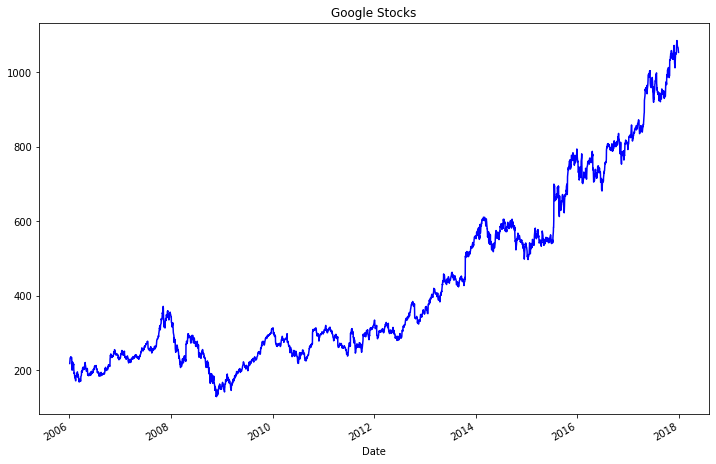

In [31]:
#function to plot closing price
def close_chart(df,column1,title=None):
    df[column1].plot(kind='line',color='b',figsize=(12,8))
    plt.title(title)
    plt.show()
    
close_chart(google_stocks,column1='Close',title='Google Stocks')

In [51]:
#method to scale the data
def data_scaling(data):
    scaler=MinMaxScaler()
    scaler.fit(data)
    return scaler

In [52]:
google_stocks['ClosePrediction']=google_stocks['Close'].shift(1)

In [53]:
google_stocks

Open     High      Low    Close    Volume   Name  \
Date                                                              
2006-01-03   211.47   218.05   209.32   217.83  13137450  GOOGL   
2006-01-04   222.17   224.70   220.09   222.84  15292353  GOOGL   
2006-01-05   223.22   226.00   220.97   225.85  10815661  GOOGL   
2006-01-06   228.66   235.49   226.85   233.06  17759521  GOOGL   
2006-01-09   233.44   236.94   230.70   233.68  12795837  GOOGL   
...             ...      ...      ...      ...       ...    ...   
2017-12-22  1070.00  1071.72  1067.64  1068.86    889446  GOOGL   
2017-12-26  1068.64  1068.86  1058.64  1065.85    918767  GOOGL   
2017-12-27  1066.60  1068.27  1058.38  1060.20   1116203  GOOGL   
2017-12-28  1062.25  1064.84  1053.38  1055.95    994249  GOOGL   
2017-12-29  1055.49  1058.05  1052.70  1053.40   1180340  GOOGL   

            ClosePrediction  
Date                         
2006-01-03              NaN  
2006-01-04           217.83  
2006-01-05           222.84  
2006-01-06           225.85  
2006-01-09           233.06  
...                     ...  
2017-12-22          1070.85  
2017-12-26          1068.86  
2017-12-27          1065.85  
2017-12-28          1060.20  
2017-12-29          1055.95  

[3019 rows x 7 columns]

<AxesSubplot:xlabel='Date'>

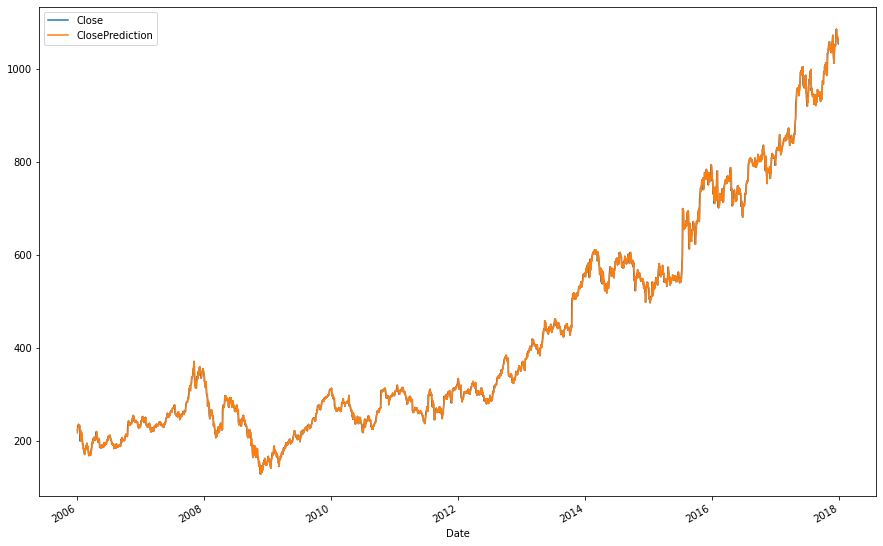

In [60]:
google_stocks_s1=google_stocks.dropna()
google_stocks_s1[["Close","ClosePrediction"]].plot(figsize=(15,10))

In [61]:
y_true=google_stocks.iloc[1:]['Close']
y_pred=google_stocks.iloc[1:]['ClosePrediction']

In [63]:
(y_true-y_pred).dot(y_true-y_pred)

144299.20849999998

In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score


In [65]:
print("mse: ",mean_squared_error(y_true, y_pred))

print("rmse: ",mean_squared_error(y_true, y_pred,squared=False))
(y_true-y_pred).dot(y_true-y_pred)/len(y_true)

print("mae: ", mean_absolute_error(y_true,y_pred))

print("R^2:", r2_score(y_true, y_pred))

print("mape: ", mean_absolute_percentage_error(y_true, y_pred))

mse:  47.81285901259111
rmse:  6.914684303176184
mae:  4.546988071570577
R^2: 0.9991438058737898
mape:  0.01211250582023634


In [69]:
google_return=np.log(google_stocks['Close'].pct_change(1)+1)

Text(0.5, 1.0, 'Google Log ')

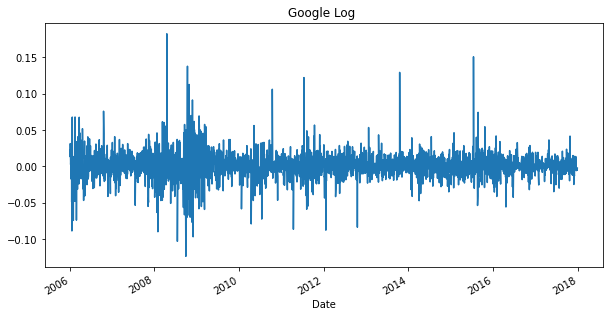

In [72]:
google_return.plot(figsize=(10,5))
plt.title("Google Log ")

In [75]:
#Moving average
google_stocks['SMA-10']=google_stocks['Close'].rolling(10).mean()

In [76]:
google_stocks.head(20)

Open    High     Low   Close    Volume   Name  ClosePrediction  \
Date                                                                           
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL              NaN   
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL           217.83   
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL           222.84   
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL           225.85   
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL           233.06   
2006-01-10  232.44  235.36  231.25  235.11   9104719  GOOGL           233.68   
2006-01-11  235.87  237.79  234.82  236.05   9008664  GOOGL           235.11   
2006-01-12  237.10  237.73  230.98  232.05  10125212  GOOGL           236.05   
2006-01-13  232.39  233.68  231.04  233.36   7660220  GOOGL           232.05   
2006-01-17  231.76  235.18  231.50  233.79   8335300  GOOGL           233.36   
2006-01-18  223.87  228.91  221.85  222.68  20511176  GOOGL           233.79   
2006-01-19  225.81  226.97  216.72  218.44  14539830  GOOGL           222.68   
2006-01-20  219.57  220.24  197.57  199.93  41182889  GOOGL           218.44   
2006-01-23  203.89  214.41  203.07  213.96  22768073  GOOGL           199.93   
2006-01-24  218.23  222.70  217.46  221.74  15468453  GOOGL           213.96   
2006-01-25  225.86  227.34  214.82  216.72  18746567  GOOGL           221.74   
2006-01-26  219.99  220.22  211.99  217.35  12931382  GOOGL           216.72   
2006-01-27  217.72  219.33  214.70  216.96   8459747  GOOGL           217.35   
2006-01-30  214.83  216.86  212.71  213.62   8596167  GOOGL           216.96   
2006-01-31  215.50  220.02  212.20  216.55  22449604  GOOGL           213.62   

             SMA-10  
Date                 
2006-01-03      NaN  
2006-01-04      NaN  
2006-01-05      NaN  
2006-01-06      NaN  
2006-01-09      NaN  
2006-01-10      NaN  
2006-01-11      NaN  
2006-01-12      NaN  
2006-01-13      NaN  
2006-01-17  230.362  
2006-01-18  230.847  
2006-01-19  230.407  
2006-01-20  227.815  
2006-01-23  225.905  
2006-01-24  224.711  
2006-01-25  222.872  
2006-01-26  221.002  
2006-01-27  219.493  
2006-01-30  217.519  
2006-01-31  215.795

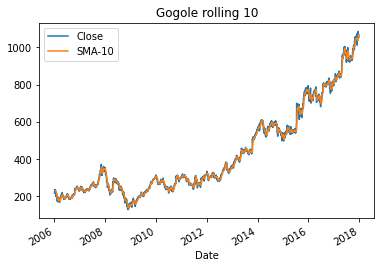

In [77]:
google_stocks[['Close','SMA-10']].plot()
plt.title('Gogole rolling 10')
plt.show()

In [82]:
google_stocks['Close'][1:11].mean()

230.84699999999998

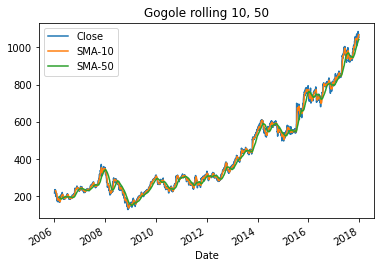

In [83]:
#Moving average
google_stocks['SMA-50']=google_stocks['Close'].rolling(50).mean()
google_stocks[['Close','SMA-10','SMA-50']].plot()
plt.title('Gogole rolling 10, 50')
plt.show()

In [84]:
#try combing stocks and check for relations

In [87]:
#microsdoft dataset
microsoft_data=pd.read_csv(r'archive (1)\MSFT_2006-01-01_to_2018-01-01.csv',parse_dates=['Date'],index_col=['Date'])

In [88]:
microsoft_data.shape

(3019, 6)

In [89]:
microsoft_data.head(2)

Open   High    Low  Close    Volume  Name
Date                                                  
2006-01-03  26.25  27.00  26.10  26.84  79974418  MSFT
2006-01-04  26.77  27.08  26.77  26.97  57975661  MSFT

In [91]:
google_microsoft=pd.merge(google_stocks['Close'],microsoft_data['Close'],left_index=True,right_index=True)
google_microsoft.dropna(inplace=True)

In [92]:
google_microsoft.shape

(3019, 2)

In [93]:
google_microsoft.head()

Close_x  Close_y
Date                        
2006-01-03   217.83    26.84
2006-01-04   222.84    26.97
2006-01-05   225.85    26.99
2006-01-06   233.06    26.91
2006-01-09   233.68    26.86

In [95]:
google_microsoft.rename({'Close_x':'Google','Close_y':'Microsoft'},axis=1,inplace=True)


In [98]:
covariance=google_microsoft.rolling(50).cov()

In [99]:
covariance


Google  Microsoft
Date                                       
2006-01-03 Google            NaN        NaN
           Microsoft         NaN        NaN
2006-01-04 Google            NaN        NaN
           Microsoft         NaN        NaN
2006-01-05 Google            NaN        NaN
...                          ...        ...
2017-12-27 Microsoft   52.342272   5.870563
2017-12-28 Google     567.250812  49.552906
           Microsoft   49.552906   5.331826
2017-12-29 Google     552.154169  46.533920
           Microsoft   46.533920   4.728467

[6038 rows x 2 columns]

In [101]:
print(covariance.loc["2017-12-26"].to_numpy())

[[593.20271429  54.75055306]
 [ 54.75055306   6.34317551]]


In [106]:
google_msft_log_return=np.log(1+google_microsoft.pct_change(1))

Text(0.5, 1.0, 'google_msft_log_return')

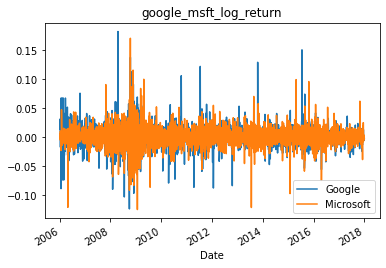

In [107]:
google_msft_log_return.plot()
plt.title('google_msft_log_return')

In [108]:
google_msft_log_return["GOOG_SMA_50"]=google_msft_log_return["Google"].rolling(50).mean()
google_msft_log_return["MSFT_SMA_50"]=google_msft_log_return["Microsoft"].rolling(50).mean()

In [111]:
cov=google_msft_log_return[['GOOG_SMA_50','MSFT_SMA_50']].rolling(50).cov()
cov.tail()

GOOG_SMA_50   MSFT_SMA_50
Date                                              
2017-12-27 MSFT_SMA_50  1.349079e-07  2.255617e-07
2017-12-28 GOOG_SMA_50  2.046628e-07  1.322665e-07
           MSFT_SMA_50  1.322665e-07  2.104664e-07
2017-12-29 GOOG_SMA_50  2.215601e-07  1.318661e-07
           MSFT_SMA_50  1.318661e-07  1.916357e-07

In [116]:
cm=sns.light_palette('red',as_cmap=True)
google_stocks_s1.head(100).style.background_gradient(cmap=cm)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

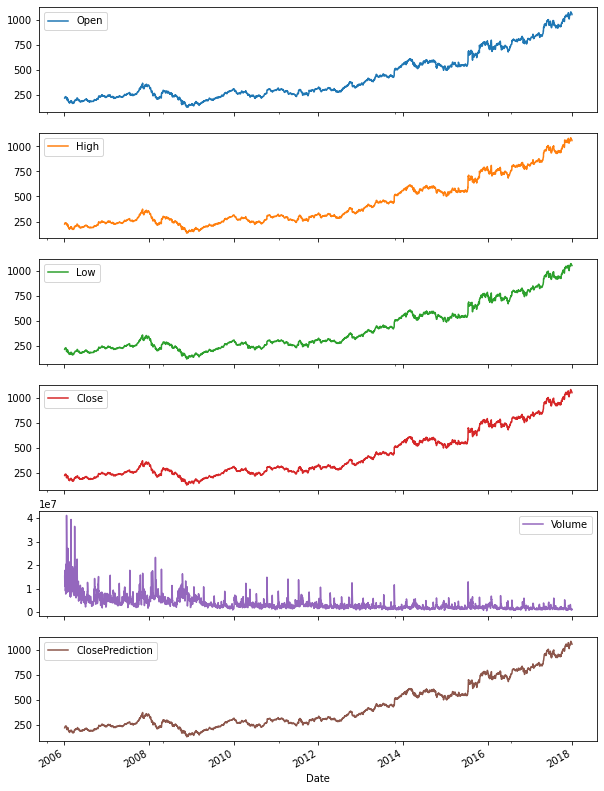

In [117]:
google_stocks_s1.plot(subplots=True, figsize=(10, 15))

In [118]:
goog=google_stocks_s1

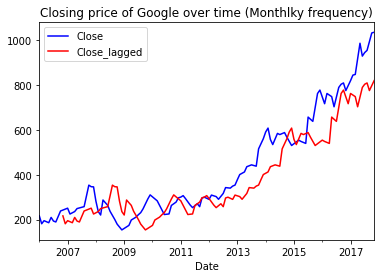

In [124]:
goog['Close'].asfreq('M').interpolate().plot(legend=True,color='b')
shifted=goog['Close'].asfreq('M').interpolate().shift(10).plot(legend=True,color='r')
plt.legend(['Close','Close_lagged'])
plt.title('Closing price of Google over time (Monthly frequency)')
plt.show()


Text(0.5, 1.0, "'Closing price of Google over time (Monthly frequency) - undersampled'")

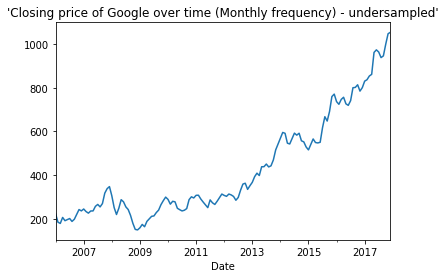

In [135]:
goog.resample('M').mean()['Close'].plot()
plt.title("'Closing price of Google over time (Monthly frequency) - undersampled'")

In [136]:
goog.resample("H").fillna(method='ffill')

Open     High      Low    Close    Volume   Name  \
Date                                                                       
2006-01-04 00:00:00   222.17   224.70   220.09   222.84  15292353  GOOGL   
2006-01-04 01:00:00   222.17   224.70   220.09   222.84  15292353  GOOGL   
2006-01-04 02:00:00   222.17   224.70   220.09   222.84  15292353  GOOGL   
2006-01-04 03:00:00   222.17   224.70   220.09   222.84  15292353  GOOGL   
2006-01-04 04:00:00   222.17   224.70   220.09   222.84  15292353  GOOGL   
...                      ...      ...      ...      ...       ...    ...   
2017-12-28 20:00:00  1062.25  1064.84  1053.38  1055.95    994249  GOOGL   
2017-12-28 21:00:00  1062.25  1064.84  1053.38  1055.95    994249  GOOGL   
2017-12-28 22:00:00  1062.25  1064.84  1053.38  1055.95    994249  GOOGL   
2017-12-28 23:00:00  1062.25  1064.84  1053.38  1055.95    994249  GOOGL   
2017-12-29 00:00:00  1055.49  1058.05  1052.70  1053.40   1180340  GOOGL   

                     ClosePrediction  
Date                                  
2006-01-04 00:00:00           217.83  
2006-01-04 01:00:00           217.83  
2006-01-04 02:00:00           217.83  
2006-01-04 03:00:00           217.83  
2006-01-04 04:00:00           217.83  
...                              ...  
2017-12-28 20:00:00          1060.20  
2017-12-28 21:00:00          1060.20  
2017-12-28 22:00:00          1060.20  
2017-12-28 23:00:00          1060.20  
2017-12-29 00:00:00          1055.95  

[105049 rows x 7 columns]

In [137]:
# Window functions:

# Rolling - Same size and sliding

# Expanding - Contains all prior values

In [139]:
# Resampling time series:

# Undersampling - Time series is resampled from high frequency to low frequency (here weekly to monthly frequency). It needs aggregation.

# Oversampling - Time series is resampled from low frequency to high frequency (here daily to hourly frequency). It needs filling or interpolating missing data

In [141]:
goog['Close'].rolling(window=30).mean().shape

(3018,)

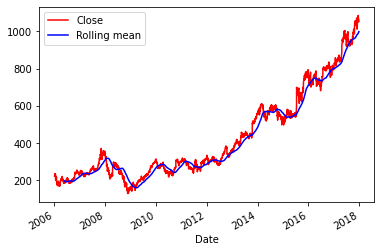

In [146]:
goog['Close'].plot(color='r')
goog['Close'].rolling(window=100).mean().plot(color='b')
plt.legend(['Close','Rolling mean'])

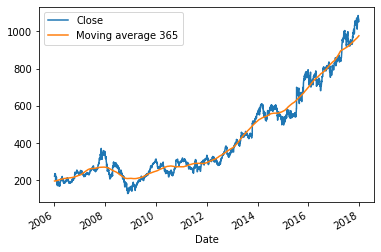

In [147]:
goog['Close'].plot()
goog['Close'].rolling(window=365,min_periods=183,center=True).mean().plot()
plt.legend(['Close','Moving average 365'])

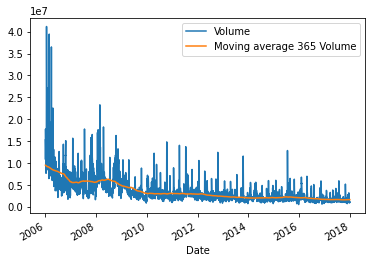

In [149]:
goog['Volume'].plot()
goog['Volume'].rolling(window=360,min_periods=180,center=True).mean().plot()
plt.legend(['Volume','Moving average 365 Volume'])

In [150]:
#Auto correlation and partial auto correlation

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

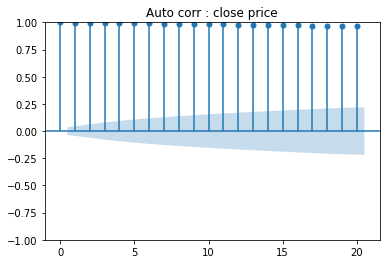

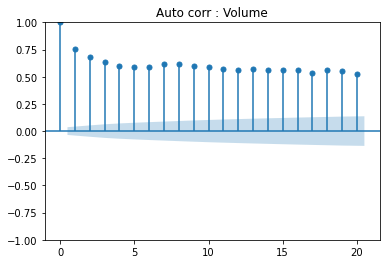

In [159]:
plot_acf(goog['Close'],lags=20,title='Auto corr : close price')
plot_acf(goog['Volume'],lags=20,title='Auto corr : Volume')
plt.show()

C:\Users\pnl0gp8t\Miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\pnl0gp8t\Miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


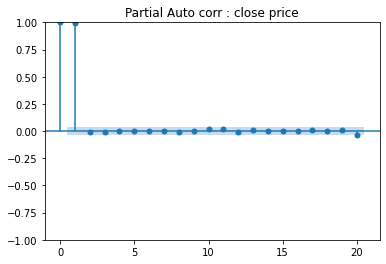

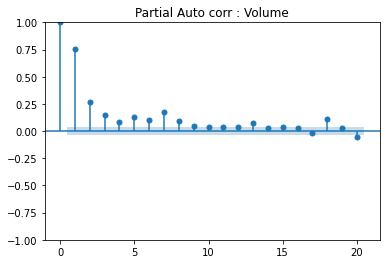

In [162]:
plot_pacf(goog['Close'],lags=20,title='Partial Auto corr : close price')
plot_pacf(goog['Volume'],lags=20,title='Partial Auto corr : Volume')
plt.show()

In [179]:
#Functionnizing correlation plot and lag plot

def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

In [180]:
def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax

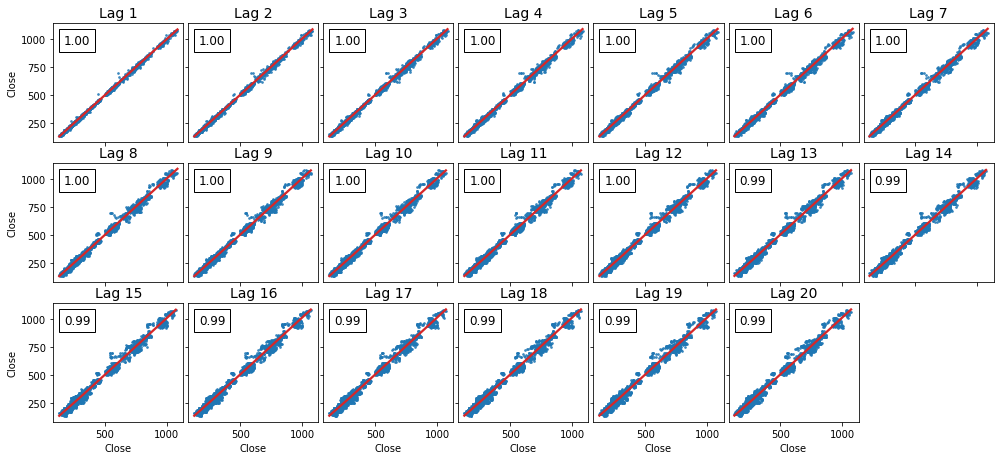

In [181]:
# A lag plot of a time series shows its values plotted against its lags
_ = plot_lags(goog["Close"], lags=20, nrows=3)

C:\Users\pnl0gp8t\Miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


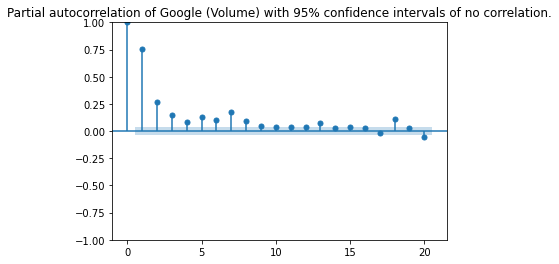

In [182]:
_ = plot_pacf(goog["Volume"],lags=20, title="Partial autocorrelation of Google (Volume) with 95% confidence intervals of no correlation.")
plt.show()

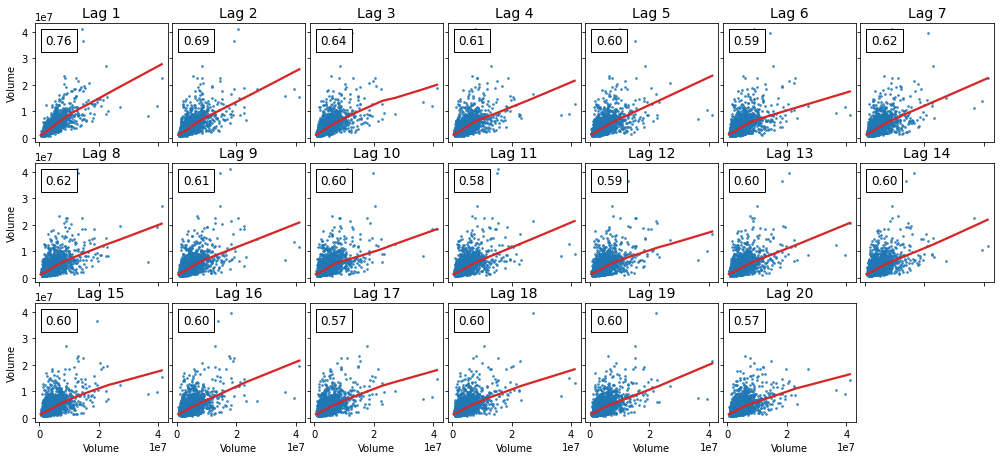

In [183]:
# A lag plot of a time series shows its values plotted against its lags
_ = plot_lags(goog["Volume"], lags=20, nrows=3)

In [184]:
def make_lags(ts,lags):
    return pd.concat(
    {
        f'y_lag_{i}':ts.shift(i) for i in range(1,lags+1)
    },
    axis=1)

In [185]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

C:\Users\pnl0gp8t\Miniconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [187]:
X = make_lags(goog["Close"], lags=1)
X = X.fillna(0.0)
y = goog["Close"].copy()

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)
print(f'Model train accuracy: {model.score(X_train, y_train)*100:.3f}%')
print(f'Model test accuracy: {model.score(X_test, y_test)*100:.3f}%')
print(f'Model train MAE: {mae(y_pred,y_train):.3f}')
print(f'Model train RMSE: {mse(y_pred,y_train, squared=False):.3f}')
print(f'Model test MAE: {mae(y_fore,y_test):.3f}')
print(f'Model test RMSE: {mse(y_fore,y_test, squared=False):.3f}')

Model train accuracy: 99.666%
Model test accuracy: 99.228%
Model train MAE: 4.005
Model train RMSE: 7.477
Model test MAE: 7.166
Model test RMSE: 9.902


In [189]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

<AxesSubplot:xlabel='Date'>

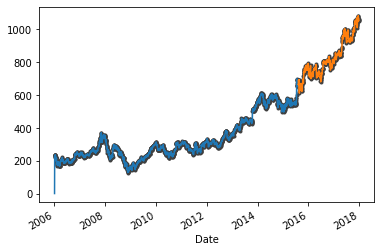

In [190]:
y_train.plot(**plot_params)
y_test.plot(**plot_params)
y_pred.plot( )
y_fore.plot( )

In [191]:
# Create X and y for ML models to predict apple["Volume"] 
X1 = make_lags(goog["Volume"], lags=11)
X1 = X1.fillna(0.0)

X2 = pd.DataFrame(goog["Volume"].shift(13)).rename(columns={"Volume":"y_lag_13"})
X2 = X2.fillna(0.0)

X3 = pd.DataFrame(goog["Volume"].shift(15)).rename(columns={"Volume":"y_lag_15"})
X3 = X3.fillna(0.0)

X4 = pd.DataFrame(goog["Volume"].shift(18)).rename(columns={"Volume":"y_lag_18"})
X4 = X4.fillna(0.0)

X5 = pd.DataFrame(goog["Volume"].shift(19)).rename(columns={"Volume":"y_lag_19"})
X5 = X5.fillna(0.0)

X = pd.concat([X1, X2, X3, X4, X5], axis=1)

y = goog["Volume"].copy()

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state= 101)

# Fit and predict
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess

model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)
print(f'Model train accuracy: {model.score(X_train, y_train)*100:.3f}%')
print(f'Model test accuracy: {model.score(X_test, y_test)*100:.3f}%')
print(f'Model train MAE: {mae(y_pred,y_train):.3f}')
print(f'Model train RMSE: {mse(y_pred,y_train, squared=False):.3f}')
print(f'Model test MAE: {mae(y_fore,y_test):.3f}')
print(f'Model test RMSE: {mse(y_fore,y_test, squared=False):.3f}')

Model train accuracy: 61.274%
Model test accuracy: 33.346%
Model train MAE: 1085297.450
Model train RMSE: 2006698.631
Model test MAE: 539556.007
Model test RMSE: 749278.645


<AxesSubplot:xlabel='Date'>

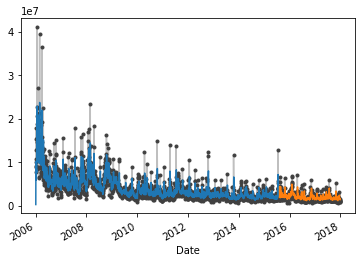

In [193]:
y_train.plot(**plot_params)
y_test.plot(**plot_params)
y_pred.plot( )
y_fore.plot( )

In [194]:
from statsmodels.tsa.deterministic import DeterministicProcess,CalendarFourier

In [195]:
y=goog['Volume'].copy()
dp=DeterministicProcess(
index=y.index,
constant=True,
order=1,
drop=True
)

x=dp.in_sample()

In [198]:
# split the date index instead of the dataframe directly.
idx_train, idx_test = train_test_split(y.index, test_size=0.2, shuffle=False)
X_train, X_test = X.loc[idx_train, :], X.loc[idx_test, :]
y_train, y_test = y.loc[idx_train], y.loc[idx_test]

In [200]:
model = LinearRegression(fit_intercept=False) # `fit_intercept=False` since we did use DeterministicProcess with constant=True 
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [201]:
y_fit = pd.Series(
    model.predict(X_train),
    index=y_train.index,
    )
y_pred = pd.Series(
    model.predict(X_test),
    index=y_test.index,
    )


C:\Users\pnl0gp8t\AppData\Local\Temp\ipykernel_17028\1272096672.py:2: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_test.plot(color='0.25', subplots=True, sharex=True, ax=axs)
C:\Users\pnl0gp8t\AppData\Local\Temp\ipykernel_17028\1272096672.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_fit.plot(color='C0', subplots=True, sharex=True, ax=axs)
C:\Users\pnl0gp8t\AppData\Local\Temp\ipykernel_17028\1272096672.py:4: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_pred.plot(color='C3', subplots=True, sharex=True, ax=axs)


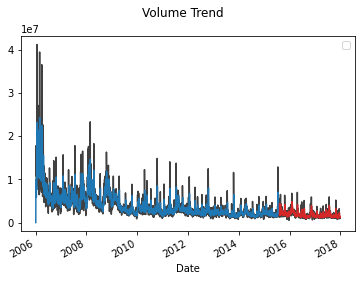

In [202]:
axs = y_train.plot(color='0.25', subplots=True, sharex=True)
axs = y_test.plot(color='0.25', subplots=True, sharex=True, ax=axs)
axs = y_fit.plot(color='C0', subplots=True, sharex=True, ax=axs)
axs = y_pred.plot(color='C3', subplots=True, sharex=True, ax=axs)
for ax in axs: ax.legend([])
_ = plt.suptitle("Volume Trend")

In [204]:
X1 = make_lags(goog["Volume"], lags=11)
X1 = X1.fillna(0.0)

X2 = pd.DataFrame(goog["Volume"].shift(13)).rename(columns={"Volume":"y_lag_13"})
X2 = X2.fillna(0.0)

X3 = pd.DataFrame(goog["Volume"].shift(15)).rename(columns={"Volume":"y_lag_15"})
X3 = X3.fillna(0.0)

X4 = pd.DataFrame(goog["Volume"].shift(18)).rename(columns={"Volume":"y_lag_18"})
X4 = X4.fillna(0.0)

X5 = pd.DataFrame(goog["Volume"].shift(19)).rename(columns={"Volume":"y_lag_19"})
X5 = X5.fillna(0.0)

In [207]:
X_train, X_test = X.loc[idx_train, :], X.loc[idx_test, :]

y_resid = y_train - y_fit

# Train XGBoost on the residuals
xgb = XGBRegressor()
xgb.fit(X_train, y_resid)

# Add the predicted residuals onto the predicted trends
y_fit_boosted = xgb.predict(X_train) + y_fit
y_pred_boosted = xgb.predict(X_test) + y_pred

C:\Users\pnl0gp8t\Miniconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [208]:
print(f'Model train MAE: {mae(y_fit_boosted,y_train):.3f}')
print(f'Model test MAE: {mae(y_pred_boosted,y_test):.3f}')

print(f'Model train RMSE: {mse(y_fit_boosted,y_train, squared=False):.3f}')
print(f'Model test RMSE: {mse(y_pred_boosted,y_test, squared=False):.3f}')

Model train MAE: 154542.799
Model test MAE: 608445.034
Model train RMSE: 213570.841
Model test RMSE: 900642.419


C:\Users\pnl0gp8t\AppData\Local\Temp\ipykernel_17028\1574584319.py:2: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_test.plot(color='0.25', subplots=True, sharex=True, ax=axs)
C:\Users\pnl0gp8t\AppData\Local\Temp\ipykernel_17028\1574584319.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_fit_boosted.plot(color='C0', subplots=True, sharex=True, ax=axs)
C:\Users\pnl0gp8t\AppData\Local\Temp\ipykernel_17028\1574584319.py:4: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = y_pred_boosted.plot(color='C3', subplots=True, sharex=True, ax=axs)


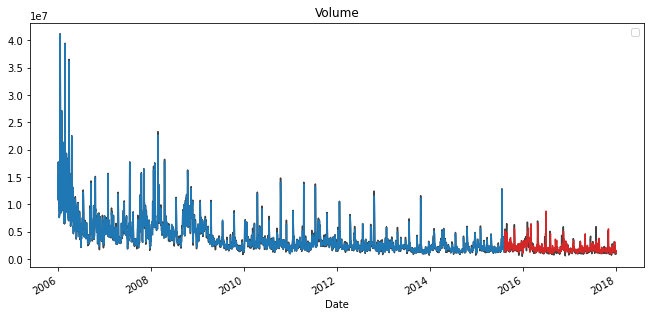

In [209]:

axs = y_train.plot(color='0.25', figsize=(11, 5), subplots=True, sharex=True, title=['Volume'])
axs = y_test.plot(color='0.25', subplots=True, sharex=True, ax=axs)
axs = y_fit_boosted.plot(color='C0', subplots=True, sharex=True, ax=axs)
axs = y_pred_boosted.plot(color='C3', subplots=True, sharex=True, ax=axs)
for ax in axs: ax.legend([])

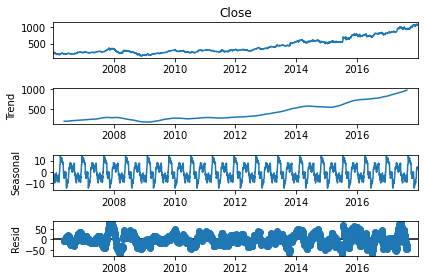

In [213]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed_close=seasonal_decompose(goog['Close'],period=180)
decomposed_close.plot(12,8)
plt.show()

In [220]:
def plot_periodogram(ts,detrend='linear',ax=None):
    from scipy.signal import periodogram
    fs=pd.Timedelta('1Y')/pd.Timedelta('1D')
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

C:\Users\pnl0gp8t\AppData\Local\Temp\ipykernel_17028\2041686663.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  plot_periodogram(goog.Close)
C:\Users\pnl0gp8t\AppData\Local\Temp\ipykernel_17028\2041686663.py:2: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  plot_periodogram(goog.Volume)


<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

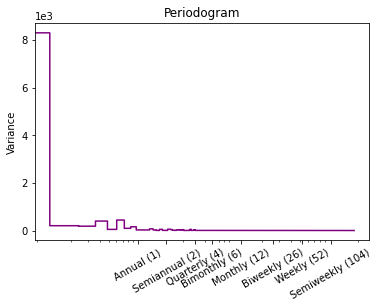

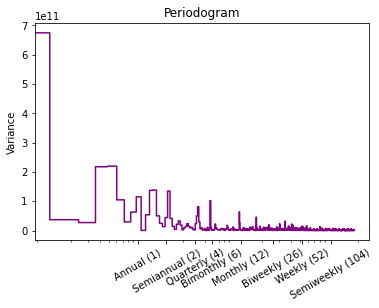

In [221]:

plot_periodogram(goog.Close)
plot_periodogram(goog.Volume)

In [222]:

def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

C:\Users\pnl0gp8t\AppData\Local\Temp\ipykernel_17028\22880787.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  X["week"] = X.index.week  # the seasonal period (period)


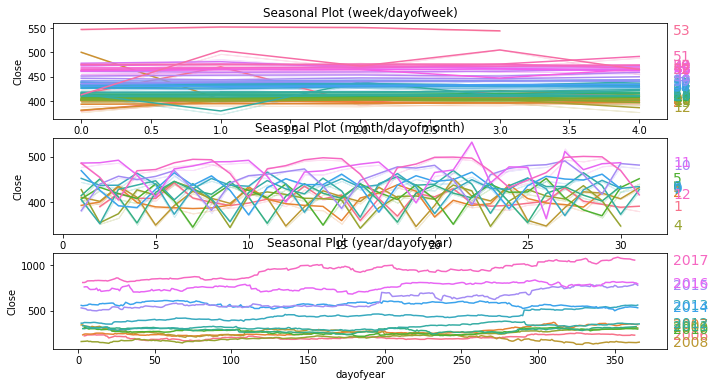

In [224]:

X = goog.copy()
# days within a week
X["dayofweek"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a month
X["dayofmonth"] = X.index.day
X["month"] = X.index.month

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(11, 6))
seasonal_plot(X, y="Close", period="week", freq="dayofweek", ax=ax0)
seasonal_plot(X, y="Close", period="month", freq="dayofmonth", ax=ax1);
seasonal_plot(X, y="Close", period="year", freq="dayofyear", ax=ax2);

C:\Users\pnl0gp8t\AppData\Local\Temp\ipykernel_17028\47623968.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  X["week"] = X.index.week  # the seasonal period (period)


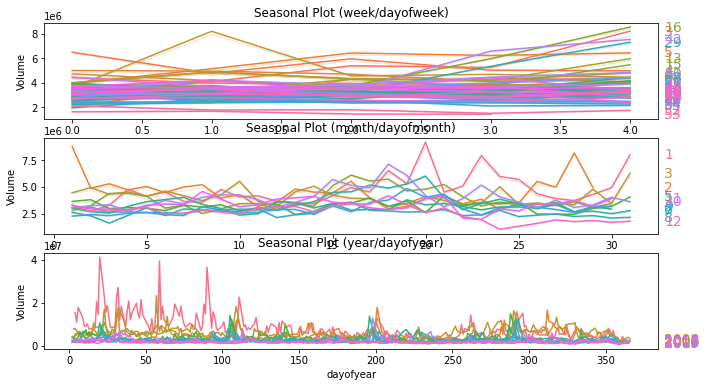

In [225]:

X = goog.copy()
# days within a week
X["dayofweek"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a month
X["dayofmonth"] = X.index.day
X["month"] = X.index.month

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(11, 6))
seasonal_plot(X, y="Volume", period="week", freq="dayofweek", ax=ax0)
seasonal_plot(X, y="Volume", period="month", freq="dayofmonth", ax=ax1);
seasonal_plot(X, y="Volume", period="year", freq="dayofyear", ax=ax2);

In [227]:
fourier = CalendarFourier(freq="A", order=3)  # 3 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=goog.index,
    constant=True,               
    order=1,                     
    #seasonal=True,              
    additional_terms=[fourier],  
    drop=True,                   
)


X_t_s = dp.in_sample() 

In [229]:
X_c = make_lags(goog["Close"], lags=1)
X_c = X_c.fillna(0.0)

In [230]:
X = pd.concat([X_t_s, X_c], axis=1)

In [231]:
y = goog["Close"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fit and predict
model = LinearRegression(fit_intercept=False)  # `fit_intercept=False` since we uses DeterministicProcess with constant=True
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)
print(f'Model train accuracy: {model.score(X_train, y_train)*100:.3f}%')
print(f'Model test accuracy: {model.score(X_test, y_test)*100:.3f}%')

print(f'Model train MAE: {mae(y_pred,y_train):.3f}')
print(f'Model train RMSE: {mse(y_pred,y_train, squared=False):.3f}')
print(f'Model test MAE: {mae(y_fore,y_test):.3f}')
print(f'Model test RMSE: {mse(y_fore,y_test, squared=False):.3f}')

Model train accuracy: 99.667%
Model test accuracy: 99.211%
Model train MAE: 4.002
Model train RMSE: 7.466
Model test MAE: 7.303
Model test RMSE: 10.011


<AxesSubplot:xlabel='Date'>

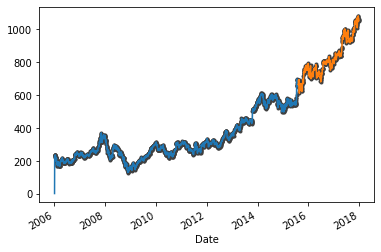

In [232]:
y_train.plot(**plot_params)
y_test.plot(**plot_params)
y_pred.plot( )
y_fore.plot( )

In [233]:
goog.index = goog.index.to_period("D")
goog.index

PeriodIndex(['2006-01-04', '2006-01-05', '2006-01-06', '2006-01-09',
             '2006-01-10', '2006-01-11', '2006-01-12', '2006-01-13',
             '2006-01-17', '2006-01-18',
             ...
             '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
             '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
             '2017-12-28', '2017-12-29'],
            dtype='period[D]', name='Date', length=3018)

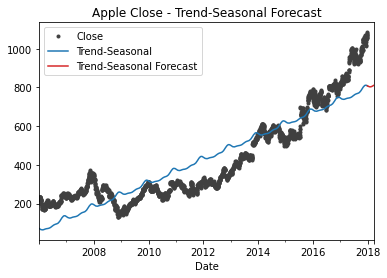

In [235]:
y = goog["Close"].copy()

fourier = CalendarFourier(freq="A", order=3)  # 3 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=goog.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    #seasonal=True,              # seasonality (indicators). 
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()  # create features for dates in apple.index

model = LinearRegression(fit_intercept=False) # `fit_intercept=False` since we uses DeterministicProcess with constant=True
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=y.index)

X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Apple Close - Trend-Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Trend-Seasonal")
ax = y_fore.plot(ax=ax, label="Trend-Seasonal Forecast", color='C3')
_ = ax.legend()

In [237]:
dataset

NameError: name 'dataset' is not defined

In [238]:
goog.shape

(3018, 7)

In [240]:
goog.head()

Open    High     Low   Close    Volume   Name  ClosePrediction
Date                                                                        
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL           217.83
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL           222.84
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL           225.85
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL           233.06
2006-01-10  232.44  235.36  231.25  235.11   9104719  GOOGL           233.68

In [242]:
goog.resample('H').mean()

Open   High     Low   Close      Volume   Name  \
Date                                                                 
2006-01-04 00:00  222.17  224.7  220.09  222.84  15292353.0  GOOGL   
2006-01-04 01:00     NaN    NaN     NaN     NaN         NaN    NaN   
2006-01-04 02:00     NaN    NaN     NaN     NaN         NaN    NaN   
2006-01-04 03:00     NaN    NaN     NaN     NaN         NaN    NaN   
2006-01-04 04:00     NaN    NaN     NaN     NaN         NaN    NaN   
...                  ...    ...     ...     ...         ...    ...   
2017-12-29 19:00     NaN    NaN     NaN     NaN         NaN    NaN   
2017-12-29 20:00     NaN    NaN     NaN     NaN         NaN    NaN   
2017-12-29 21:00     NaN    NaN     NaN     NaN         NaN    NaN   
2017-12-29 22:00     NaN    NaN     NaN     NaN         NaN    NaN   
2017-12-29 23:00     NaN    NaN     NaN     NaN         NaN    NaN   

                  ClosePrediction  
Date                               
2006-01-04 00:00           217.83  
2006-01-04 01:00              NaN  
2006-01-04 02:00              NaN  
2006-01-04 03:00              NaN  
2006-01-04 04:00              NaN  
...                           ...  
2017-12-29 19:00              NaN  
2017-12-29 20:00              NaN  
2017-12-29 21:00              NaN  
2017-12-29 22:00              NaN  
2017-12-29 23:00              NaN  

[105072 rows x 7 columns]

In [243]:
goog.resample('D').mean()

Open     High      Low    Close      Volume  ClosePrediction
Date                                                                       
2006-01-04   222.17   224.70   220.09   222.84  15292353.0           217.83
2006-01-05   223.22   226.00   220.97   225.85  10815661.0           222.84
2006-01-06   228.66   235.49   226.85   233.06  17759521.0           225.85
2006-01-07      NaN      NaN      NaN      NaN         NaN              NaN
2006-01-08      NaN      NaN      NaN      NaN         NaN              NaN
...             ...      ...      ...      ...         ...              ...
2017-12-25      NaN      NaN      NaN      NaN         NaN              NaN
2017-12-26  1068.64  1068.86  1058.64  1065.85    918767.0          1068.86
2017-12-27  1066.60  1068.27  1058.38  1060.20   1116203.0          1065.85
2017-12-28  1062.25  1064.84  1053.38  1055.95    994249.0          1060.20
2017-12-29  1055.49  1058.05  1052.70  1053.40   1180340.0          1055.95

[4378 rows x 6 columns]

In [244]:
from pandas_profiling import ProfileReport

In [245]:
ProfileReport(goog)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]